# 4.10 Coding Etiquette and Excel Reporting

#### Please note, due to memory constraints we are using a 70% randomised and representative sample of the full data set for our analyses and visualisations. This subet was created in a previous exercise. 

###  Contents:

1. Importing libraries and files

2. Customer profile aggregation for usage frequency and expenditure. 

3. Customer profile comparison in regions and departments. 

4. Exporting updated dataframes and charts
    
   ** **

## 1. Importing libraries and files

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#create usable path 
path = r'C:\Users\rutha\CareerFoundry\01-23_Instacart_Basket_Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_data', 'final_project.pkl'))

In [4]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,region,exclusion_flag,age_category,income_flag,profile_age,profile_fam,department,alcohol_drinker,pet_owner,order_time_period
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,South,high-activity,Youth,Low,low-income married adult,low-income family,dairy eggs,No,No,Early bird
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,South,high-activity,Youth,Low,low-income married adult,low-income family,household,No,No,Early bird
5,2398795,1,2,3,7,15.0,196,1,1,both,...,South,high-activity,Youth,Low,low-income married adult,low-income family,beverages,No,No,Early bird
7,2398795,1,2,3,7,15.0,12427,3,1,both,...,South,high-activity,Youth,Low,low-income married adult,low-income family,snacks,No,No,Early bird
8,2398795,1,2,3,7,15.0,13176,4,0,both,...,South,high-activity,Youth,Low,low-income married adult,low-income family,produce,No,No,Early bird


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21695423 entries, 1 to 32435058
Data columns (total 41 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                int32         
 1   user_id                 int32         
 2   order_number            int8          
 3   orders_day_of_week      int8          
 4   order_hour_of_day       int8          
 5   days_since_prior_order  float16       
 6   product_id              int16         
 7   add_to_cart_order       int16         
 8   reordered               int16         
 9   _merge                  category      
 10  product_name            object        
 11  aisle_id                float16       
 12  department_id           float16       
 13  prices                  float64       
 14  price_range_loc         object        
 15  busiest_days            object        
 16  busiest_period_of_day   object        
 17  max_order               int8          
 18  

In [5]:
df.shape

(21695423, 41)

## 2. Customer profile aggregation for usage frequency and expenditure

#### 2.1 Family and Department Spend

In [6]:
# Calculating the mode to see most usual values per column
print(df.groupby('profile_fam').agg(lambda x:x.value_counts().index[0]))

                           order_id  user_id  order_number  \
profile_fam                                                  
high-income family          2970392   182401             1   
high-income no dependants    237581   176478             1   
low-income family           2621625     4694             1   
low-income no dependants     790903   129928             1   
mid-income family           1564244   201268             1   
mid-income no dependants    2660847    13701             1   

                           orders_day_of_week  order_hour_of_day  \
profile_fam                                                        
high-income family                          0                 10   
high-income no dependants                   0                 10   
low-income family                           1                 10   
low-income no dependants                    1                 10   
mid-income family                           0                 10   
mid-income no dependants   

In [7]:
# aggregating min, max, mean of prices and avg_days_since_last_order for all profiles
df.groupby('profile_fam').agg({'prices': ['mean', 'min', 'max'], 'days_since_prior_order': ['mean', 'min', 'max']})

prices            days_since_prior_order       \
                               mean  min   max                   mean  min   
profile_fam                                                                  
high-income family         7.953145  1.0  25.0              10.796875  0.0   
high-income no dependants  7.942273  1.0  25.0              10.656250  0.0   
low-income family          7.358973  1.0  25.0              10.929688  0.0   
low-income no dependants   7.357743  1.0  25.0              10.953125  0.0   
mid-income family          7.956684  1.0  25.0              10.757812  0.0   
mid-income no dependants   7.956947  1.0  25.0              10.781250  0.0   

                                 
                            max  
profile_fam                      
high-income family         30.0  
high-income no dependants  30.0  
low-income family          30.0  
low-income no dependants   30.0  
mid-income family          30.0  
mid-income no dependants   30.0

In [9]:
#show all columns
pd.set_option('display.max_columns', None)

In [11]:
ct_fam_dept = pd.crosstab(df['profile_fam'], df['department'], dropna = False)

([<matplotlib.axis.XTick at 0x24aa998f550>,
 [Text(0, 0, 'high-income\nfamily'),
  Text(1, 0, 'high-income\nno dependants'),
  Text(2, 0, 'low-income\nfamily'),
  Text(3, 0, 'low-income\nno dependants'),
  Text(4, 0, 'mid-income\nfamily'),
  Text(5, 0, 'mid-income\nno dependants')])

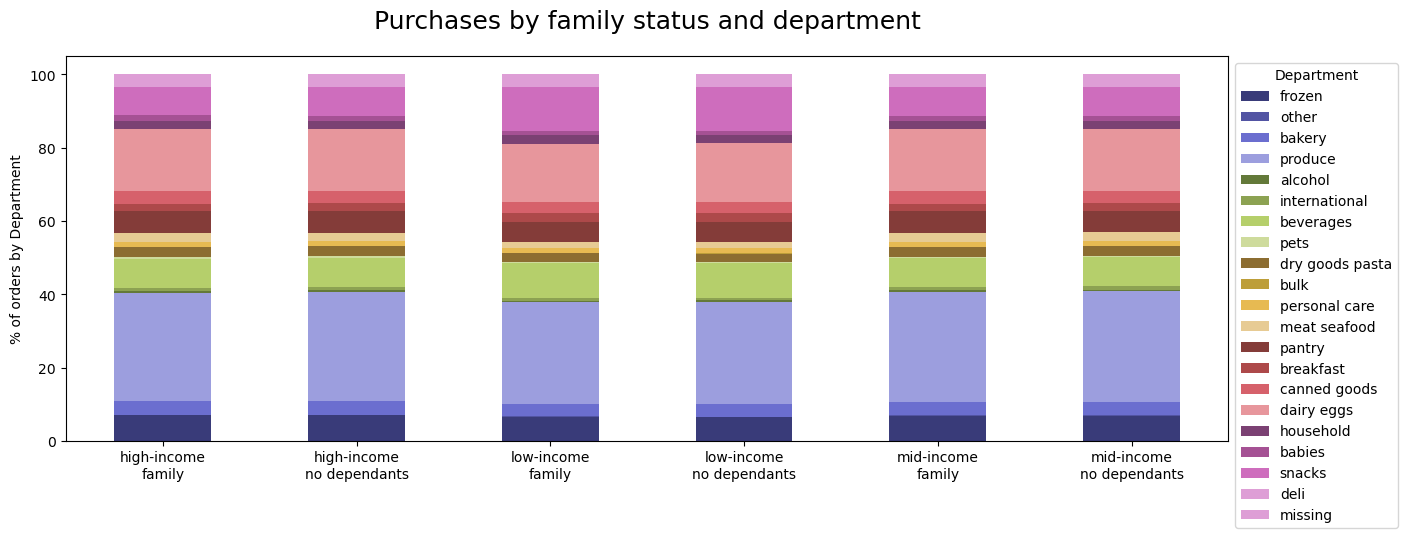

In [12]:
##### Creating stacked bar graph to plot profile for department
bar_profile_department = ct_fam_dept.loc[:,['frozen','other','bakery','produce','alcohol','international','beverages','pets','dry goods pasta','bulk','personal care','meat seafood','pantry','breakfast','canned goods','dairy eggs','household','babies','snacks','deli','missing']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=0, figsize=(15,5), colormap='tab20b').legend(title="Department", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("% of orders by Department")
plt.title ("Purchases by family status and department", fontsize = 18, pad=20)
plt.xticks([0,1,2,3,4,5],['high-income\nfamily','high-income\nno dependants','low-income\nfamily','low-income\nno dependants','mid-income\nfamily','mid-income\nno dependants'])


In [13]:
# comparing customer profiles and departments
ct_fam_dept2 = pd.crosstab(df['profile_fam'], df['department'], dropna = False, normalize = 'index')

In [14]:
ct_fam_dept2

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
profile_fam,,,,,,,,,,,,,,,,,,,,,
high-income family,0.004970,0.013842,0.037388,0.079501,0.021007,0.000967,0.034506,0.169438,0.032340,0.027672,0.069913,0.022895,0.008407,0.023901,0.002131,0.001112,0.059047,0.013706,0.003152,0.296613,0.077493
high-income no dependants,0.005414,0.013729,0.037348,0.080213,0.020781,0.000969,0.033427,0.168656,0.032541,0.027265,0.070208,0.022664,0.008465,0.022923,0.002004,0.001120,0.059077,0.013569,0.003466,0.297551,0.078608
low-income family,0.004696,0.011316,0.034273,0.094356,0.023986,0.001238,0.029045,0.159791,0.031962,0.023543,0.066477,0.023574,0.007591,0.017135,0.002054,0.001081,0.054351,0.013767,0.002836,0.276830,0.120098
low-income no dependants,0.004702,0.010897,0.034491,0.093941,0.023736,0.001128,0.029456,0.160944,0.032701,0.023474,0.065730,0.023372,0.007589,0.016862,0.002168,0.001189,0.054162,0.014258,0.002732,0.277663,0.118804
mid-income family,0.004363,0.014029,0.036501,0.078039,0.020712,0.001089,0.034019,0.170337,0.032587,0.027795,0.069011,0.022117,0.008573,0.023590,0.002105,0.001109,0.058751,0.013653,0.002947,0.300914,0.077761
mid-income no dependants,0.004323,0.014738,0.036863,0.078956,0.020582,0.001033,0.033675,0.170059,0.032787,0.027640,0.068927,0.021039,0.008655,0.023463,0.002036,0.001131,0.058007,0.013482,0.002925,0.302067,0.077612


#### 2.2 Order time of day and Department 

In [16]:
#looking at departmental spending by order time habit
crosstab_dpt_time = pd.crosstab(df['department'], df['order_time_period'], dropna = False)

In [17]:
crosstab_dpt_time

order_time_period,Early bird,Night owl,Regular
department,,,
alcohol,5555,23587,71949
babies,35196,74411,177907
bakery,75676,196784,512208
beverages,161728,444620,1194557
breakfast,48096,117885,303344
bulk,2116,6029,15277
canned goods,61687,177207,469999
dairy eggs,361287,910558,2351376
deli,62078,181059,459771


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

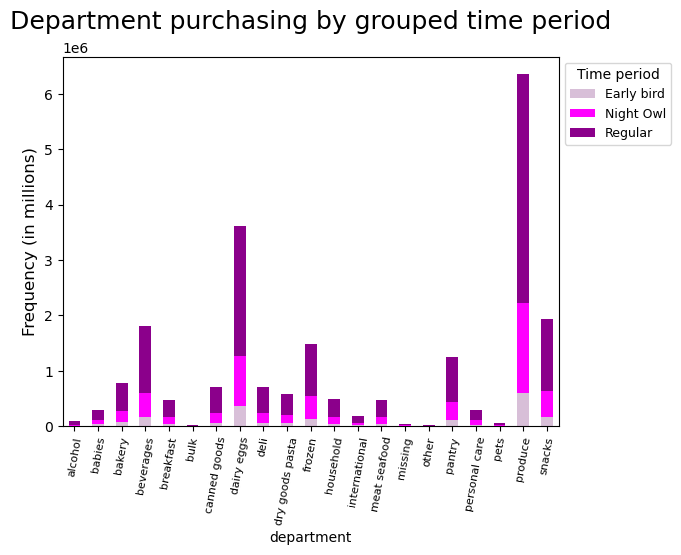

In [20]:
bar_dept_time = crosstab_dpt_time.plot(kind = 'bar', stacked = True, color =['thistle','magenta','darkmagenta'])
bar_dept_time.legend(title='Time period', bbox_to_anchor=(1.0,1.0), loc='upper left', labels=['Early bird', 'Night Owl', 'Regular'], fontsize = 9)
plt.title('Department purchasing by grouped time period', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xticks(rotation=80, fontsize = 8)

#### 2.3 Family status and region

In [21]:
#comparing different profiles by region
crosstab_region = pd.crosstab(df['profile_fam'], df['region'], dropna = False)

In [22]:
crosstab_region

region,Midwest,Northeast,South,West
profile_fam,,,,
high-income family,1142874,860133,1578349,1223951
high-income no dependants,390720,282187,538986,414235
low-income family,1045411,773630,1493716,1164304
low-income no dependants,337431,268860,503667,384783
mid-income family,1621139,1246374,2342465,1778867
mid-income no dependants,548744,398901,766951,588745


In [23]:
#comparing different profiles by region as %
crosstab_region2 = pd.crosstab(df['profile_fam'], df['region'], normalize = 'index')

In [24]:
crosstab_region2

region,Midwest,Northeast,South,West
profile_fam,,,,
high-income family,0.237836,0.178996,0.328460,0.254708
high-income no dependants,0.240276,0.173533,0.331454,0.254737
low-income family,0.233504,0.172799,0.333638,0.260060
low-income no dependants,0.225745,0.179871,0.336959,0.257425
mid-income family,0.231961,0.178338,0.335172,0.254529
mid-income no dependants,0.238238,0.173184,0.332973,0.255605


([<matplotlib.axis.XTick at 0x24aaa4e3580>,
 [Text(0, 0, 'high-income\nfamily'),
  Text(1, 0, 'high-income\nno dependants'),
  Text(2, 0, 'low-income\nfamily'),
  Text(3, 0, 'low-income\nno dependants'),
  Text(4, 0, 'mid-income\nfamily'),
  Text(5, 0, 'mid-income\nno dependants')])

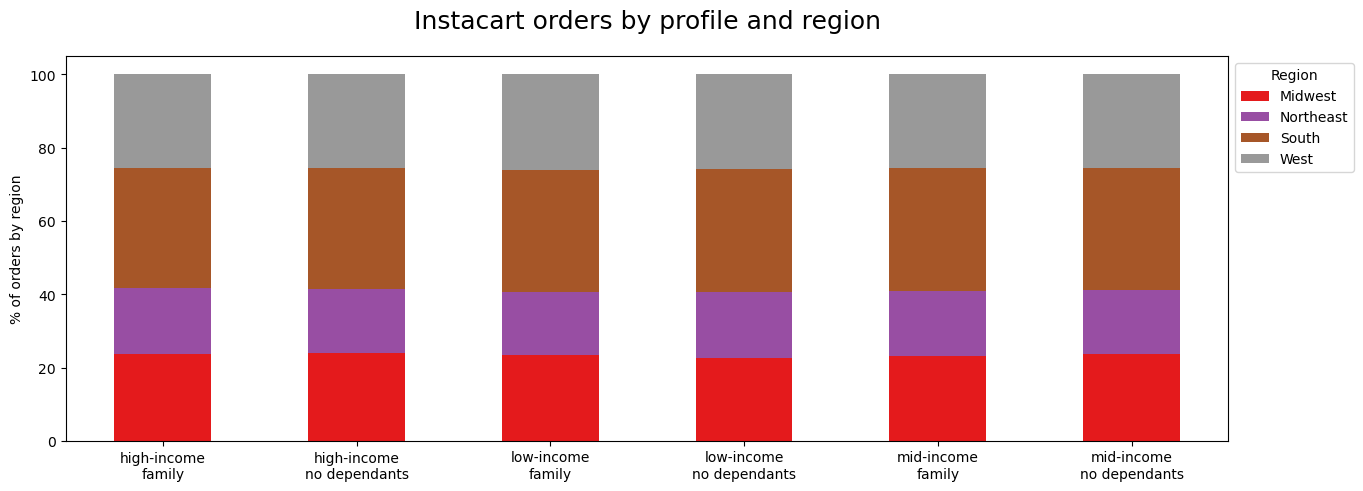

In [25]:
# Creating stacked bar graph to plot profile for regions
bar_profile_region = crosstab_region.loc[:,['Midwest','Northeast','South','West']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=0, figsize=(15,5), colormap='Set1').legend(title="Region", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("% of orders by region")
plt.title ("Instacart orders by profile and region", fontsize = 18, pad=20)
plt.xticks([0,1,2,3,4,5],['high-income\nfamily','high-income\nno dependants','low-income\nfamily','low-income\nno dependants','mid-income\nfamily','mid-income\nno dependants'])


### 3. Customer Profiling and Regions and Departments 

#### 3.1 Department and grouped price ranges

In [26]:
#comparing price ranges and departments
crosstab_price_dpt = pd.crosstab(df['department'], df['price_range_loc'], dropna = False)

In [27]:
crosstab_price_dpt

price_range_loc,High-range product,Low-range product,Mid-range product
department,,,
alcohol,0,23010,78081
babies,0,85174,202340
bakery,0,192327,592341
beverages,0,570109,1230796
breakfast,0,146426,322899
bulk,0,848,22574
canned goods,0,197293,511600
dairy eggs,3446,960334,2659441
deli,0,209515,493393


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

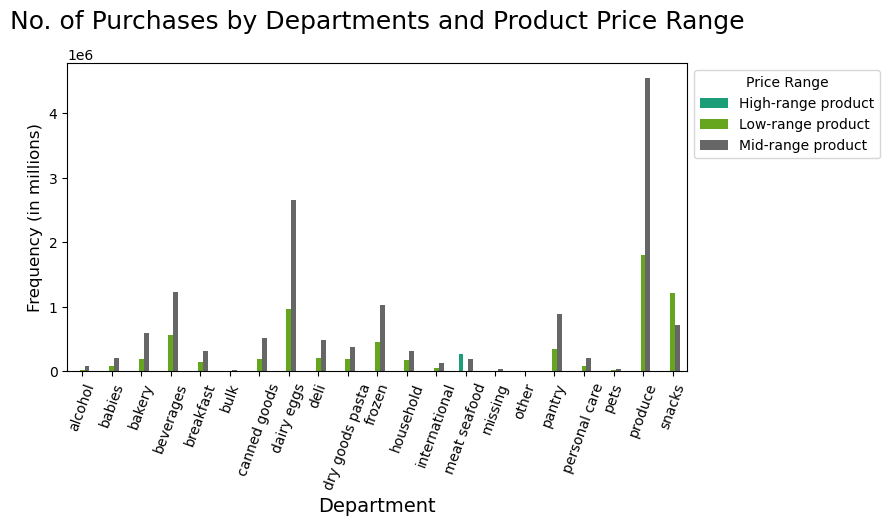

In [28]:
bar_crosstab_price_dpt = crosstab_price_dpt.plot(kind = 'bar', figsize=(8,4), rot = 0, colormap='Dark2').legend(title="Price Range", bbox_to_anchor=(1.0,1.0))
plt.title('No. of Purchases by Departments and Product Price Range', fontsize = 18, pad=25)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Department',  fontsize = 14)
plt.xticks(rotation=70)

#### 3.2 Department and loyalty status

In [29]:
#comparing loyalty status and departments
crosstab_loyalty_dpt = pd.crosstab(df['department'], df['loyalty_flag'], dropna = False)

In [30]:
crosstab_loyalty_dpt

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,27007,20081,54003
babies,117311,32699,137504
bakery,265600,120495,398573
beverages,598829,277452,924624
breakfast,155097,74176,240052
bulk,9777,2856,10789
canned goods,206365,126043,376485
dairy eggs,1281628,525373,1816220
deli,227014,110819,365075


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

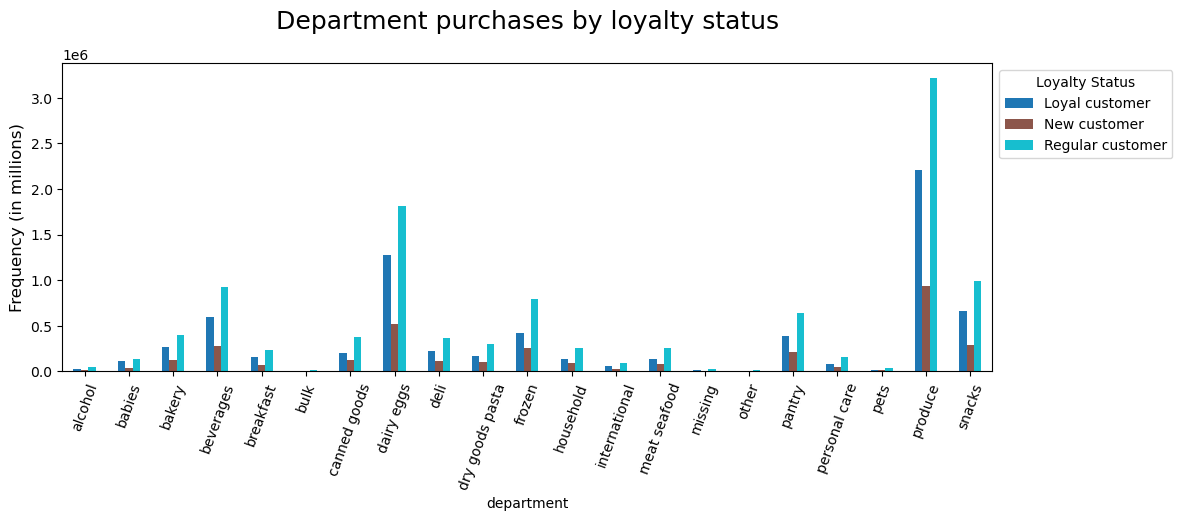

In [31]:
bar_crosstab_loyal_dpt = crosstab_loyalty_dpt.plot(kind = 'bar', figsize=(12,4), rot = 0, colormap='tab10').legend(title="Loyalty Status", bbox_to_anchor=(1.0,1.0))
plt.title('Department purchases by loyalty status', fontsize = 18, pad=25)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xticks(rotation=70)

#### 3.3 Region and loyalty status

In [32]:
#comparing regions and loyalty status
crosstab_region_loyalty = pd.crosstab(df['region'], df['loyalty_flag'], dropna = False)

In [33]:
crosstab_region_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,1663550,796148,2626621
Northeast,1291186,589857,1949042
South,2386770,1116487,3720877
West,1865929,863056,2825900


Text(0.5, 0, 'Region')

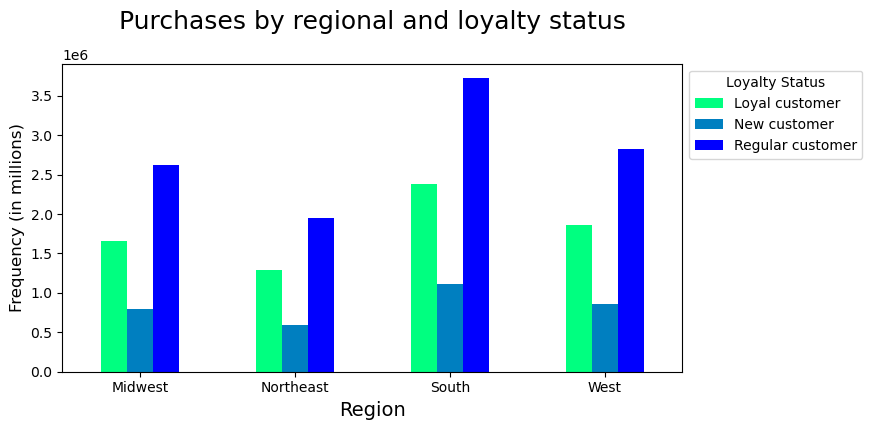

In [34]:
bar_crosstab_loyal_region = crosstab_region_loyalty.plot(kind = 'bar', figsize=(8,4), rot = 0, colormap='winter_r').legend(title="Loyalty Status", bbox_to_anchor=(1.0,1.0))
plt.title('Purchases by regional and loyalty status', fontsize = 18, pad=25)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 14)



#### 3.4 Region and loyalty status

In [35]:
#comparing regions and loyalty status
crosstab_region_loyalty_normalize = pd.crosstab(df['region'], df['loyalty_flag'], dropna = False, normalize = 'index')

In [36]:
crosstab_region_loyalty_normalize

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,0.327064,0.156527,0.516409
Northeast,0.337117,0.154006,0.508877
South,0.330388,0.154550,0.515062
West,0.335908,0.155369,0.508723


Text(0.5, 0, 'Region')

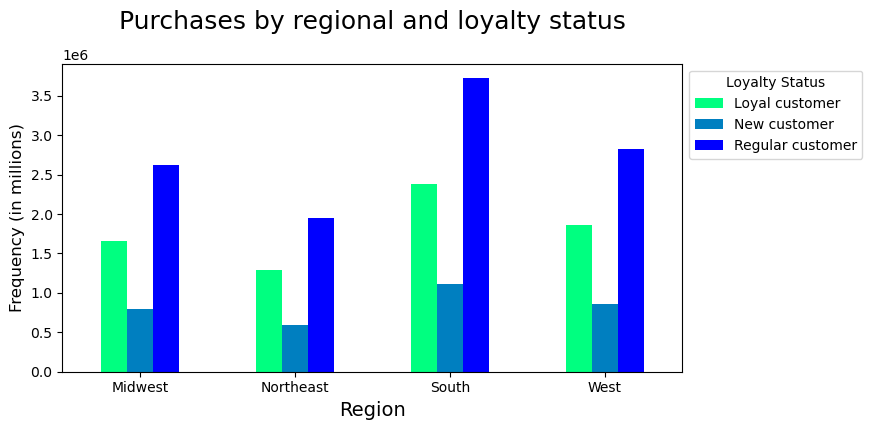

In [37]:
bar_crosstab_loyal_region_normalize = crosstab_region_loyalty.plot(kind = 'bar', figsize=(8,4), rot = 0, colormap='winter_r').legend(title="Loyalty Status", bbox_to_anchor=(1.0,1.0))
plt.title('Purchases by regional and loyalty status', fontsize = 18, pad=25)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 14)

#### 3.5 Region and grouped price  

In [38]:
#comparing regions and product price range
crosstab_region_price = pd.crosstab(df['region'], df['price_range_loc'], dropna = False)

In [39]:
crosstab_region_price

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
Midwest,65398,1587146,3429335
Northeast,48935,1199141,2578166
South,92857,2252247,4872261
West,71575,1734912,3743302


Text(0, 0.5, 'No. purchases (in millions)')

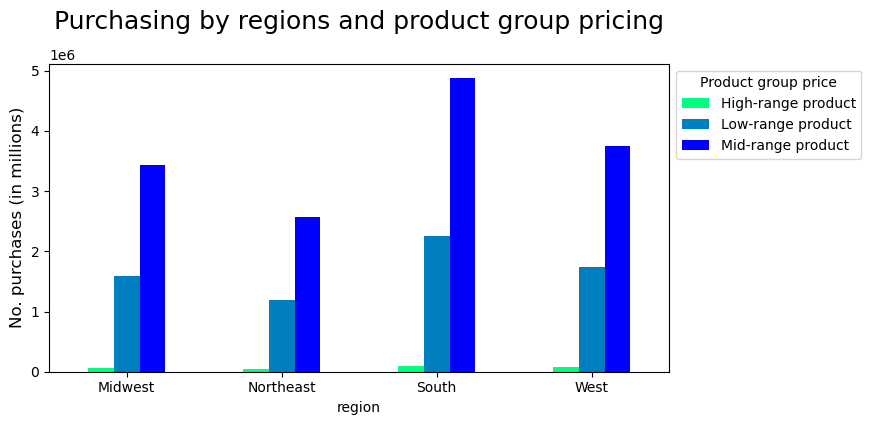

In [40]:
bar_crosstab_region_price = crosstab_region_price.plot(kind = 'bar', figsize=(8,4), rot = 0, colormap='winter_r').legend(title="Product group price", bbox_to_anchor=(1.0,1.0))
plt.title('Purchasing by regions and product group pricing', fontsize = 18, pad=25)
plt.ylabel('No. purchases (in millions)', fontsize = 12)


#### 3.6 Region and income

In [41]:
#comparing region and income
crosstab_income_region = pd.crosstab(df['region'], df['income_flag'], dropna = False)

In [42]:
crosstab_income_region

income_flag,High,Low,Middle
region,,,
Midwest,1533594,1382842,2169883
Northeast,1142320,1042490,1645275
South,2117335,1997383,3109416
West,1638186,1549087,2367612


Text(0.5, 0, '')

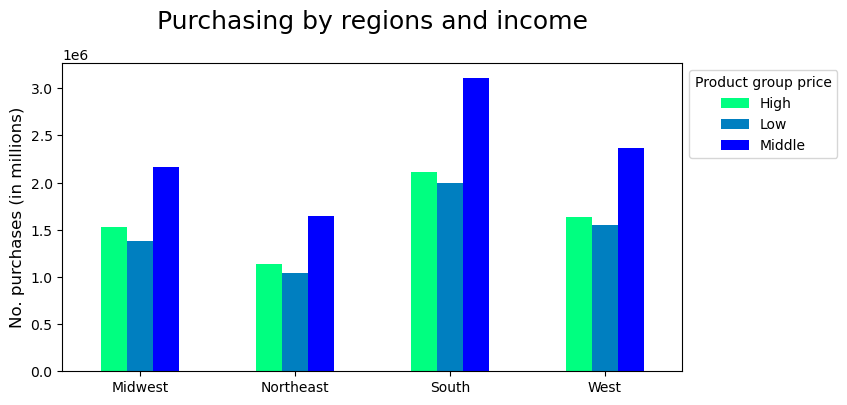

In [43]:
bar_crosstab_region_income = crosstab_income_region.plot(kind = 'bar', figsize=(8,4), rot = 0, colormap='winter_r').legend(title="Product group price", bbox_to_anchor=(1.0,1.0))
plt.title('Purchasing by regions and income', fontsize = 18, pad=25)
plt.ylabel('No. purchases (in millions)', fontsize = 12)
plt.xlabel('')

#### 3.6 Income and day of week

In [44]:
#comparing region and income
crosstab_income_day = pd.crosstab(df['income_flag'], df['orders_day_of_week'], dropna = False)

In [45]:
crosstab_income_day

orders_day_of_week,0,1,2,3,4,5,6
income_flag,,,,,,,
High,1255594,1097785,825676,759935,749848,827091,915506
Low,1051512,1104425,801976,725543,718243,802628,767475
Middle,1832125,1590213,1192392,1085172,1071817,1196454,1324013


Text(0.5, 0, 'Income')

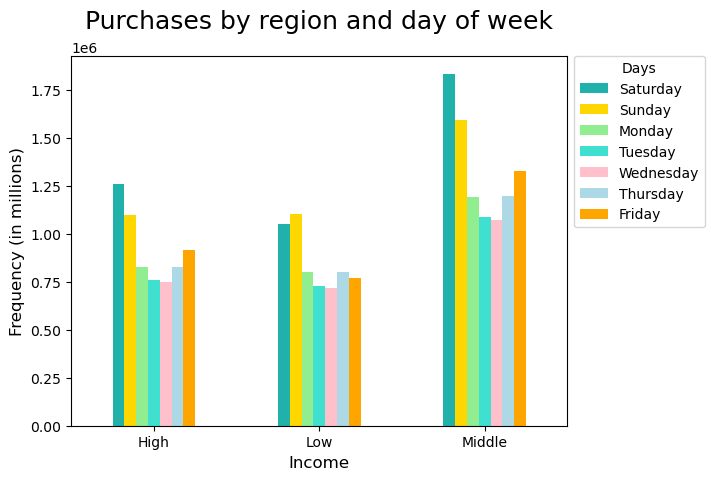

In [46]:
bar_income_day = crosstab_income_day.plot(kind = 'bar', rot = 0, color= ['lightseagreen', 'gold', 'lightgreen', 'turquoise', 'pink', 'lightblue', 'orange'])
bar_income_day.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Purchases by region and day of week', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Income',  fontsize = 12)

## 4. Exporting Dataframe

#### Dataframe

In [47]:
df.to_pickle(os.path.join(path, '02_Data', 'Prepared_data', 'final_project2.pkl'))

#### Visuals

In [48]:
bar_profile_department.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar_profile_department.06.png'))

In [49]:
bar_dept_time.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar_profile_regio.06.png'))

In [50]:
bar_profile_region.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar_profile_region.06.png'))

In [51]:
bar_crosstab_price_dpt.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar_crosstab_price_dpt.06.png'))

In [52]:
bar_crosstab_loyal_dpt.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar_crosstab_loyal_dpt.06.png'))

In [53]:
bar_crosstab_loyal_region.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar_crosstab_loyal_region.06.png'))

In [54]:
bar_crosstab_region_price.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar_crosstab_region_price.06.png'))

In [55]:
bar_income_day.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar_income_day.06.png'))